In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from scipy import stats
import numpy as np

hotel_data = pd.read_csv('hotel_bookings.csv')
hotel_data#.describe(include = 'object')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [2]:
df = pd.DataFrame(hotel_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df = pd.DataFrame(hotel_data)
for col in df.describe(include  = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.drop(['agent', 'company'], axis = 1, inplace = True)
df.dropna(inplace = True) #Data cleaning complete

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:ylabel='Frequency'>

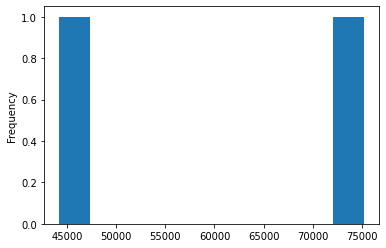

In [9]:
#Figure out: Reservation status count (x = cancelled/notcancelled, y = count) hist
pd.value_counts(hotel_data['is_canceled']).plot.hist()

In [39]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<AxesSubplot:xlabel='hotel', ylabel='count'>

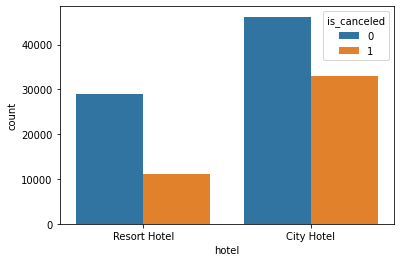

In [11]:
#Figure out: Reservation status in different hotels
res = hotel_data.groupby([hotel_data.hotel, hotel_data.is_canceled]).count()
sns.countplot(x = 'hotel', data = hotel_data, hue = 'is_canceled')

Text(0.5, 1.0, 'ADR with time')

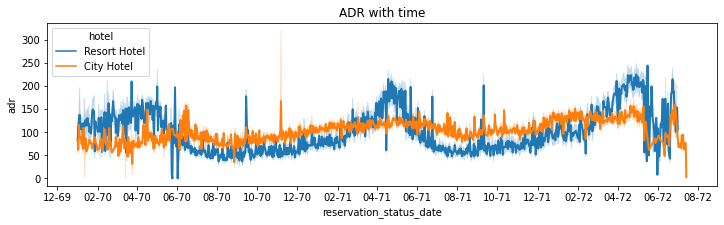

In [65]:
#Figure out: Plot y = average daily rate (adr) in city/resort, x = date
fig, axes = plt.subplots(figsize = (12, 3))
sns.lineplot(x = 'reservation_status_date', y = 'adr', data = hotel_data, ax = axes, linewidth = 2, hue = 'hotel')
axes.xaxis.set_major_formatter(DateFormatter("%m-%y"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
axes.set_title("ADR with time")

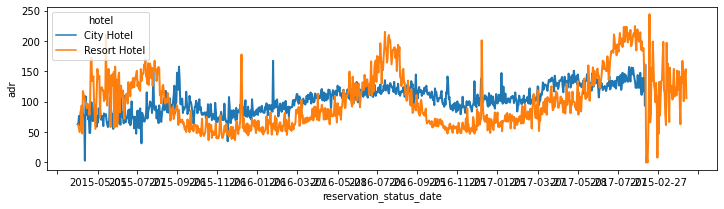

In [98]:
fig, axes = plt.subplots(figsize = (12, 3))
dat = hotel_data.groupby(['hotel', 'reservation_status_date'])[['hotel', 'reservation_status_date', 'adr']].mean()
sns.lineplot(x = 'reservation_status_date', y = 'adr', data = dat, ax = axes, linewidth = 2, hue = 'hotel')
#axes.xaxis.set_major_formatter(DateFormatter("%y-%b"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))

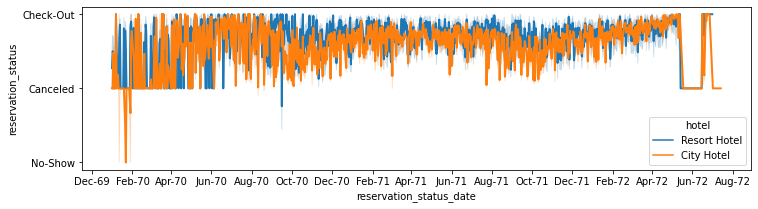

In [101]:
#reservation status per month as bar graph for both hotels
fig, axes = plt.subplots(figsize = (12, 3))
sns.lineplot(x = 'reservation_status_date', y = 'reservation_status', data = hotel_data, ax = axes, linewidth = 2, hue = 'hotel')
axes.xaxis.set_major_formatter(DateFormatter("%b-%y"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

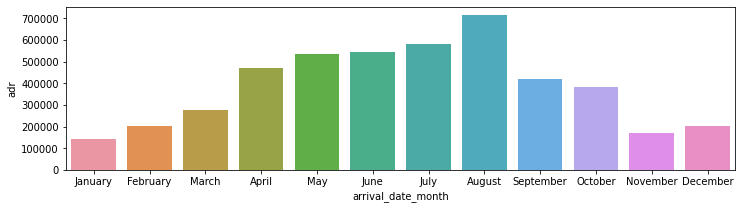

In [30]:
#adr per month as bar
fig, axes = plt.subplots(figsize = (12, 3))
dat = hotel_data.loc[hotel_data.is_canceled == 1].groupby('arrival_date_month')[['adr']].sum().reset_index()
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dat['arrival_date_month'] = pd.Categorical(dat['arrival_date_month'], categories = months, ordered = True)
dat.sort_values(by = 'arrival_date_month', inplace = True)
sns.barplot(x = 'arrival_date_month', y = 'adr', data = dat, ax = axes)

([<matplotlib.patches.Wedge at 0x1249448b0>,
 [Text(-0.6486479706231274, 0.8884007036278723, 'PRT'),
  Text(-0.12429436280215385, -1.0929551277960163, 'GBR'),
  Text(0.2797610009026121, -1.0638297713327864, 'ESP'),
  Text(0.6083579436571936, -0.9164609170003873, 'FRA'),
  Text(0.8245010439701849, -0.7281469827528474, 'ITA'),
  Text(0.954958661809011, -0.5459431785780853, 'DEU'),
  Text(1.0312772570969826, -0.38271035914190277, 'IRL'),
  Text(1.0729095093498013, -0.24262148451192198, 'BRA'),
  Text(1.0926181033926405, -0.12722295444875134, 'USA'),
  Text(1.0992092846107648, -0.04170070293760958, 'BEL')],
 [Text(-0.35380798397625124, 0.4845822019788394, '70.07%'),
  Text(-0.06779692516481119, -0.5961573424341907, '6.25%'),
  Text(0.15259690958324293, -0.580270784363338, '5.54%'),
  Text(0.33183160563119646, -0.49988777290930214, '4.92%'),
  Text(0.44972784216555534, -0.39717108150155306, '3.39%'),
  Text(0.520886542804915, -0.2977871883153192, '3.10%'),
  Text(0.5625148675074451, -0.2087

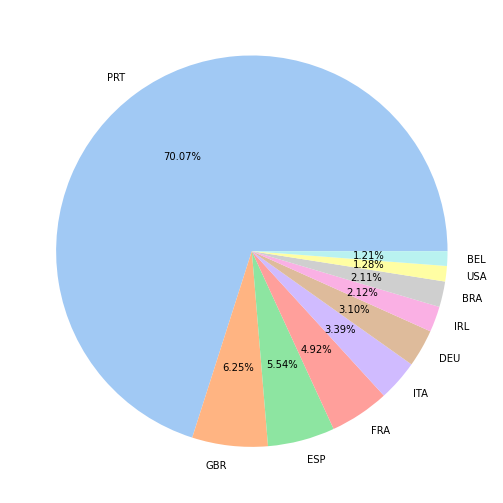

In [22]:
#top 10 countries with reservation cancelled as pie chart
dat = hotel_data.loc[hotel_data.is_canceled == 1]
top10 = dat['country'].value_counts()[:10]
colors = sns.color_palette('pastel')[0 : 10]
plt.figure(figsize = (9 , 9))
plt.pie(top10, labels = top10.index, colors = colors, autopct = '%.2f%%')

<AxesSubplot:>

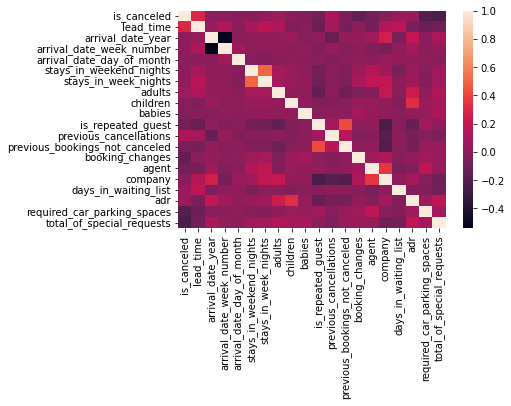

In [7]:
#heatmap of hotel_data
corr = hotel_data.corr()    #adr with arrival_date_year
sns.heatmap(corr)             

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

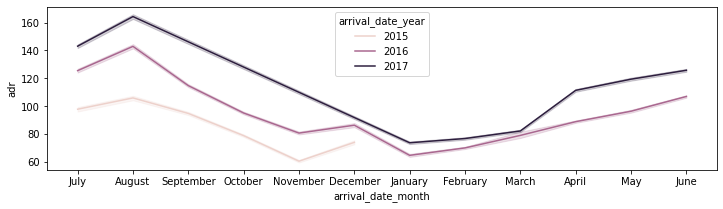

In [8]:
fig, axes = plt.subplots(figsize = (12, 3))
dat = hotel_data.loc[hotel_data.arrival_date_year == 2015]
sns.lineplot(x = 'arrival_date_month', y = 'adr', data = hotel_data, ax = axes, hue = 'arrival_date_year')

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

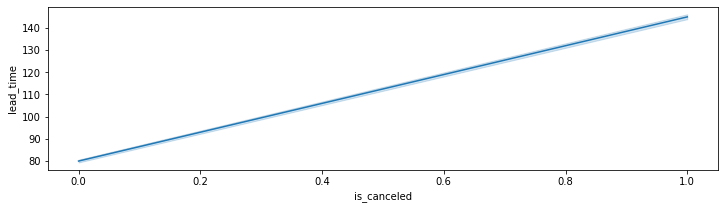

In [9]:
fig, axes = plt.subplots(figsize = (12, 3))
sns.lineplot(x = 'is_canceled', y = 'lead_time', data = hotel_data, ax = axes)

<AxesSubplot:xlabel='lead_time', ylabel='is_canceled'>

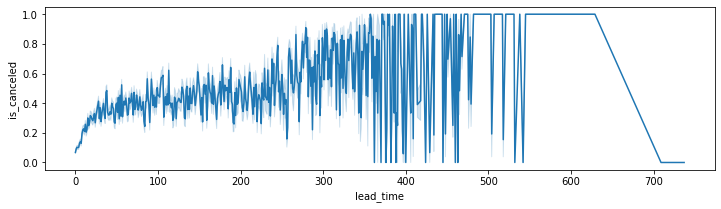

In [23]:
fig, axes = plt.subplots(figsize = (12, 3))
sns.lineplot(x = 'lead_time', y = 'is_canceled', data = hotel_data, ax = axes)

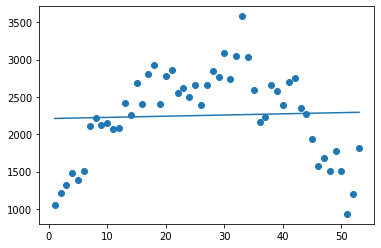

In [63]:
def make_eqn(x):
    return slope * x + intercepts

dat = hotel_data.groupby(hotel_data.arrival_date_week_number, as_index = False).count()[['arrival_date_week_number', 'hotel']]
x = np.array(dat['arrival_date_week_number'])
y = np.array(dat['hotel'])
slope, intercepts, r, p, std_error = stats.linregress(x, y)
mymodel = list(map(make_eqn, x)) 
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()